# Project 1: Digit Classification with KNN and Naive Bayes

In [1]:
print 'hello world'

hello world


In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [2]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)
print "finished"

finished


Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [3]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='datasets/mnist')

# parse numbers data
X, Y = mnist.data, mnist.target
print 'finished'

finished


In [4]:
# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

print 'data shape: ', X.shape
print 'label shape:', Y.shape
print 'mini data shape:', mini_train_data.shape
print 'mini data shape:', mini_train_labels.shape

data shape:  (70000, 784)
label shape: (70000,)
mini data shape: (1000, 784)
mini data shape: (1000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

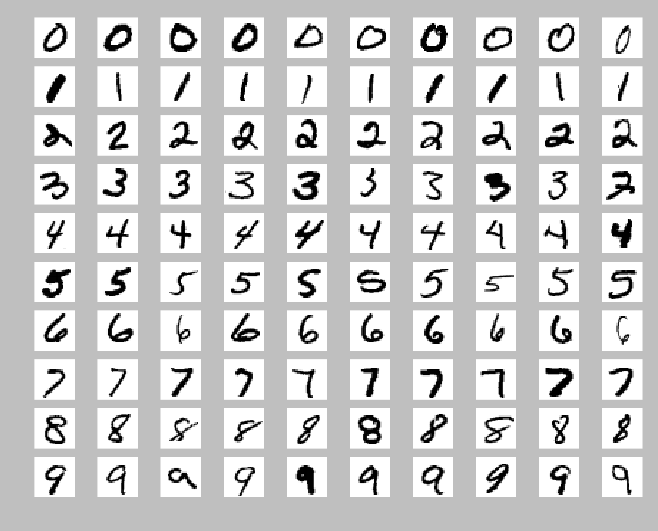

Plotting Time: 6.02369713783


In [5]:
def P1(data, labels, num_examples=10):

    plt.rcdefaults() #reset default pyplot rc params, then set colormap and interpolation
    plt.rcParams['image.cmap'] = 'binary'
    plt.rcParams['image.interpolation'] = 'none'
    
    start = time.time() #timer
    fig, plots = plt.subplots(10,num_examples) # create plot with 1 row for each digit and num_examples columns
    for i in xrange(0,10,1):
        example_array = np.random.permutation(data[np.where(labels == i)])[:num_examples] # get num_examples random digits from training
        for j in xrange(0,num_examples,1): # plot all examples
            plots[i][j].imshow(example_array[j].reshape(28,28)) # plot matrix into subplot
            plots[i][j].axis('off')
    plt.show()
    plt.rcdefaults() #reset default pyplot rc params
    print "Plotting Time:", time.time() - start
### STUDENT END ###

P1(mini_train_data, mini_train_labels, 10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [6]:
# Standard method to format classification outputs
def displayOutput(result):
    def printResult(res):
        print """
--------------------------------------
%s
Execution time: %.04f seconds
Accuracy: %f

Report
%s
--------------------------------------
            """ % res
    if type(result) is list:
        for res in result:
            printResult(res)
    else:
        printResult(result)

In [7]:
def P2(k_values, withplots=False):

    results = []
    
    for k in k_values:
        start = time.time()
        
        # KNN classifier with "k" neighbors. Distance is standard Euclidean distance
        knn = KNeighborsClassifier(n_neighbors=k, weights='uniform', algorithm='brute', p=2, metric='minkowski')
        knn.fit(X=mini_train_data, y=mini_train_labels) # fit the training data
        
        predicted = knn.predict(dev_data) # get predictions from dev data
        end = time.time()
        
        classification = classification_report(dev_labels, predicted, target_names=['zero','one','two','three','four','five','six','seven','eight','nine'])
        
        accuracy = (float(len(predicted)) - len(np.where(predicted != dev_labels)[0])) / len(predicted) # quick accuracy calculation
        
        results.append(("%d nearest neighbors" % k, float(end - start), accuracy, classification))
        
        if withplots: # optional method to plot wrong guesses and right answers to wrong guesses
            plt.subplot(1,2,1)
            plt.hist(predicted[np.where(predicted != dev_labels)])
            plt.title('Incorrect Predictions')
            plt.subplot(1,2,2)
            plt.hist(dev_labels[np.where(predicted != dev_labels)])
            plt.title('Correct Answers')
            plt.show()
            
    return results

k_values = [1, 3, 5, 7, 9]
result = P2(k_values, withplots=False)

displayOutput(result[0]) # print results for k == 1
# displayOutput(result) # Uncomment this line to see results for all k-values


--------------------------------------
1 nearest neighbors
Execution time: 0.0357 seconds
Accuracy: 0.888000

Report
             precision    recall  f1-score   support

       zero       0.91      0.98      0.94        99
        one       0.89      1.00      0.94       105
        two       0.99      0.79      0.88       102
      three       0.77      0.87      0.82        86
       four       0.89      0.82      0.85       104
       five       0.93      0.84      0.88        91
        six       0.94      0.96      0.95        98
      seven       0.89      0.92      0.90       113
      eight       0.94      0.88      0.91        96
       nine       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000

--------------------------------------
            


ANSWER: Which is the most difficult digit?

####In terms of F-score, this classifier had the worst performance on the digit "9". "3" also proved to be difficult.

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [8]:
def P3(train_sizes):
    
    accuracies = []
    for size in train_sizes:
        data, labels = train_data[0:size], train_labels[0:size] # get training data with sufficient size
        start = time.time()
        knn = KNeighborsClassifier(n_neighbors=1, weights='uniform', algorithm='brute', p=2, metric='minkowski')
        knn.fit(X=data, y=labels) # fit the training data
        predicted = knn.predict(dev_data) # get predictions from dev data
        end = time.time()
        accuracy = (float(len(predicted)) - len(np.where(predicted != dev_labels)[0])) / len(predicted) # quick accuracy calculation
        accuracies.append(accuracy)
        print '%d training data executed in %.04f seconds' % (size, float(end - start))
    return accuracies


### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accs = P3(train_sizes)
for i, j in zip(train_sizes,accs):
    print "Size:", i, "Accuracy:", j

100 training data executed in 0.0067 seconds
200 training data executed in 0.0125 seconds
400 training data executed in 0.0144 seconds
800 training data executed in 0.0186 seconds
1600 training data executed in 0.0471 seconds
3200 training data executed in 0.0897 seconds
6400 training data executed in 0.1730 seconds
12800 training data executed in 0.3733 seconds
25000 training data executed in 0.8071 seconds
Size: 100 Accuracy: 0.72
Size: 200 Accuracy: 0.786
Size: 400 Accuracy: 0.841
Size: 800 Accuracy: 0.884
Size: 1600 Accuracy: 0.902
Size: 3200 Accuracy: 0.926
Size: 6400 Accuracy: 0.937
Size: 12800 Accuracy: 0.959
Size: 25000 Accuracy: 0.97


(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

Prediction for  1 : [ 0.84316264]
Prediction for  10000 : [ 0.90980869]
Prediction for  25000 : [ 1.00978776]
Prediction for  60000 : [ 1.24307226]


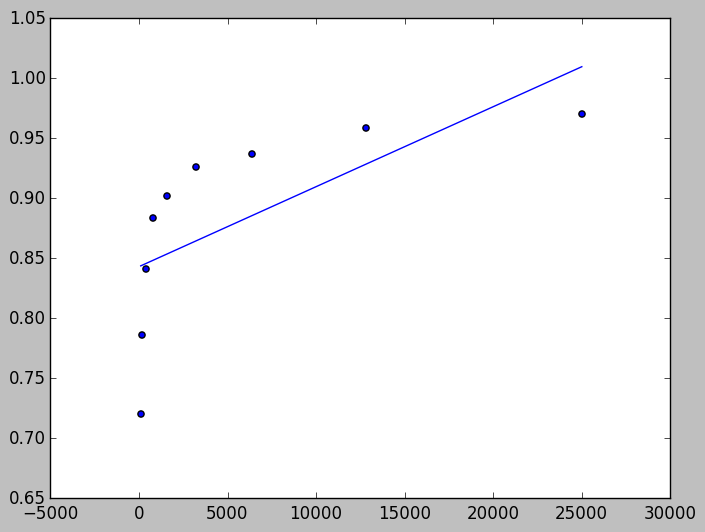

Prediction for  1 : [ 0.56881456]
Prediction for  10000 : [ 0.9581288]
Prediction for  25000 : [ 0.99685973]
Prediction for  60000 : [ 1.03386514]


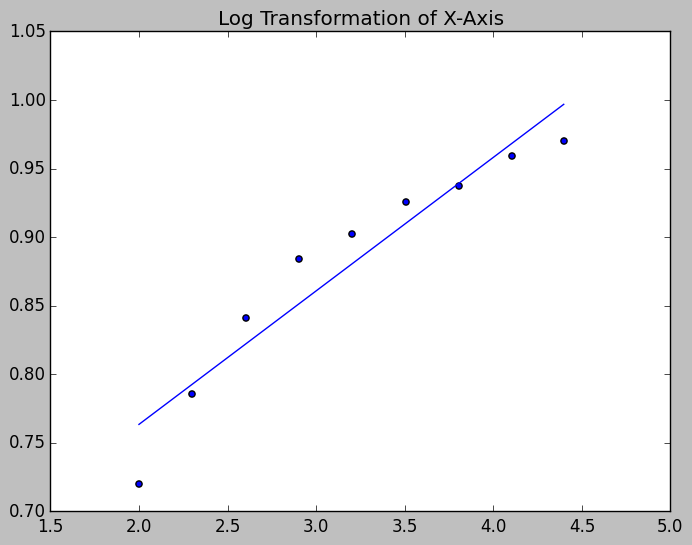

In [10]:
def P4(train_sizes=train_sizes, accs=accs, logtrans = False):
    lr = LinearRegression()
    
    values = train_sizes
    inputs=[1,10000,25000,60000] # vector of inputs for linear model testing
    
    if logtrans:
        values = np.log10(values) # logarithmic transformation of training-data-size values
    
    valmatrix = np.reshape(np.matrix(values), (len(train_sizes),1)) # reshape vector to numpy matrix
    lr.fit(valmatrix, accs) # fit linear model
    
    # loop to output linear model prediction results for each input value
    for predictor in inputs:
        if logtrans:
            prediction = lr.predict([[np.log10(predictor)]])
        else:
            prediction = lr.predict([[predictor]])
        print 'Prediction for ', predictor , ':', prediction
        
    # plot model
    plt.scatter(values, accs)
    plt.plot(values, lr.predict(valmatrix))
    if logtrans: plt.title('Log Transformation of X-Axis')
    plt.show()

### STUDENT END ###

P4()
P4(logtrans=True)

ANSWER: What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

####A standard linear model predicts an accuracy of 124% for a training set of size 60,000. (1st result set above) This is clearly a poor estimate because it is impossible for accuracy to be greater than 100%.

####A plot of the accuracy v. training size shows an approximately logarithmic relationship. Using a logarithmic transformation on the x-axis (2nd result set above), the prediction for 60,000 is still an impossible 103% accuracy, but the fit is clearly much better.

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

[[ 97   0   0   0   0   0   2   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  4   4  81   4   0   0   0   4   3   2]
 [  1   0   0  75   0   3   0   3   1   3]
 [  0   2   0   0  85   0   3   0   0  14]
 [  2   0   0   9   0  76   0   1   1   2]
 [  1   1   1   0   1   0  94   0   0   0]
 [  1   4   0   1   1   0   0 104   0   2]
 [  0   2   0   5   0   2   1   0  84   2]
 [  1   0   0   3   9   1   0   5   0  87]]


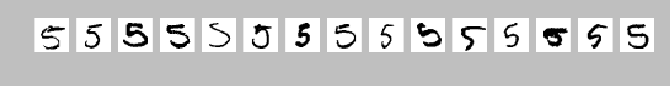

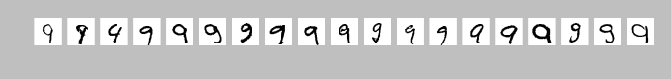

In [11]:
def P5(data, labels):

    knn = KNeighborsClassifier(n_neighbors=1, weights='uniform', algorithm='brute', p=2, metric='minkowski')
    knn.fit(X=data, y=labels) # fit the training data
    predicted = knn.predict(dev_data) # get predictions from dev data
    
    cmat =  confusion_matrix(dev_labels, predicted)
    
    print cmat
    
    # subset dev data that were misclassified most often by the algorithm
    mistakes5 = dev_data[dev_labels==5][np.where(predicted[dev_labels==5] != dev_labels[dev_labels==5])]
    mistakes9 = dev_data[dev_labels==9][np.where(predicted[dev_labels==9] != dev_labels[dev_labels==9])]
    
    # loops below plot misclassified images of 9 and 5, which were most often confused
    plt.rcParams['image.cmap'] = 'binary'
    plt.rcParams['image.interpolation'] = 'none'
    n = 0
    for i in mistakes5:
        n += 1
        plt.subplot(1,len(mistakes5),n)
        plt.imshow(i.reshape(28,28))
        plt.axis('off')
    plt.show()
        
    n = 0
    for i in mistakes9:
        n += 1
        plt.subplot(1,len(mistakes9),n)
        plt.imshow(i.reshape(28,28))
        plt.axis('off')
    plt.show()
    
### STUDENT END ###

P5(mini_train_data, mini_train_labels)

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

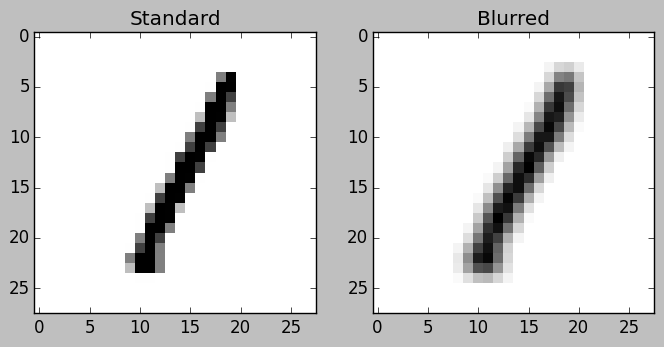

In [12]:
def blurMatrix(matrix):
    # This function is pretty slow and deals with border pixels by ignoring them...
    # But it does work

    outmatrix = np.zeros(matrix.shape) # initialize an empty output array
    
    def getBlur(mat): # inner function takes target pixel and 8 surrounding pixels, and returns weigted value
        blur = np.matrix([[0.07511361,0.1238414,0.07511361],
                         [0.1238414,0.20417996,0.1238414],
                         [0.07511361,0.1238414,0.07511361]])
        return np.sum(np.multiply(mat, blur))

    # iterates over all non-border pixels in image and applies gaussian blur defined above
    for i in xrange(1, matrix.shape[0]-1, 1):
        for j in xrange(1, matrix.shape[1]-1, 1):
            outmatrix[i,j] = getBlur(matrix[i-1:i+2, j-1:j+2])
    return outmatrix

# TEST BLUR
blurred = blurMatrix(train_data[0].reshape(28,28))
plt.rcParams['image.cmap'] = 'binary'
plt.rcParams['image.interpolation'] = 'none'
plt.subplot(1,2,1)
plt.imshow(train_data[0].reshape(28,28))
plt.title('Standard')
plt.subplot(1,2,2)
plt.title('Blurred')
plt.imshow(blurred)
plt.show()
plt.rcdefaults()

In [12]:
def P6(data, labels):
    results = []

    # empty arrays for blurred images
    blurdata = np.zeros(data.shape)
    blurdev = np.zeros(dev_data.shape)
    
    start = time.time()
    print "Blurring"
    for i in xrange(0,len(data),1):
        blurdata[i] = blurMatrix(data[i].reshape(28,28)).reshape(784)   
    for i in xrange(0,len(dev_data),1):
        blurdev[i] = blurMatrix(dev_data[i].reshape(28,28)).reshape(784)
    print "Blur Finished:", time.time() - start, 'seconds'

    knn = KNeighborsClassifier(n_neighbors=1, weights='uniform', algorithm='brute', p=2, metric='minkowski')
    
    # KNN Classifier with blurred training data and standard dev data
    start = time.time()
    knn.fit(X=blurdata, y=labels) # fit the blurred training data
    predicted = knn.predict(dev_data) # get predictions from dev data
    end = time.time()
    classification = classification_report(dev_labels, predicted, target_names=['zero','one','two','three','four','five','six','seven','eight','nine'])
    accuracy = (float(len(predicted)) - len(np.where(predicted != dev_labels)[0])) / len(predicted) # quick accuracy calculation
    results.append(('Blurred Train - Regular Dev', float(end - start), accuracy, classification))
    
    # KNN Classifier with standard training data and blurred dev data
    start = time.time()
    knn.fit(X=data, y=labels) # fit the training data
    predicted = knn.predict(blurdev) # get predictions from blurred dev data
    end = time.time()
    classification = classification_report(dev_labels, predicted, target_names=['zero','one','two','three','four','five','six','seven','eight','nine'])
    accuracy = (float(len(predicted)) - len(np.where(predicted != dev_labels)[0])) / len(predicted) # quick accuracy calculation
    results.append(('Regular Train - Blurred Dev', float(end - start), accuracy, classification))
    
    # KNN Classifier with standard training data and blurred dev data
    start = time.time()
    knn.fit(X=blurdata, y=labels) # fit the blurred training data
    predicted = knn.predict(blurdev) # get predictions from blurred dev data
    end = time.time()
    classification = classification_report(dev_labels, predicted, target_names=['zero','one','two','three','four','five','six','seven','eight','nine'])
    accuracy = (float(len(predicted)) - len(np.where(predicted != dev_labels)[0])) / len(predicted) # quick accuracy calculation
    results.append(('Blurred Train - Blurred Dev', float(end - start), accuracy, classification))
    
    return results


result = P6(mini_train_data, mini_train_labels)

displayOutput(result)

Blurring
Blur Finished: 24.0447001457 seconds

--------------------------------------
Blurred Train - Regular Dev
Execution time: 0.0330 seconds
Accuracy: 0.905000

Report
             precision    recall  f1-score   support

       zero       0.92      0.98      0.95        99
        one       0.95      0.99      0.97       105
        two       0.97      0.83      0.89       102
      three       0.80      0.87      0.83        86
       four       0.92      0.82      0.87       104
       five       0.92      0.88      0.90        91
        six       0.96      0.96      0.96        98
      seven       0.91      0.93      0.92       113
      eight       0.92      0.92      0.92        96
       nine       0.80      0.87      0.83       106

avg / total       0.91      0.91      0.91      1000

--------------------------------------
            

--------------------------------------
Regular Train - Blurred Dev
Execution time: 0.0223 seconds
Accuracy: 0.875000

Report
           

ANSWER: Try applying your blur filter in 3 ways:
preprocess the training data but not the dev data
preprocess the dev data but not the training data
preprocess both training and dev data

####It appears that blurring the training data but predicting classes with un-processed data gives the best result, but it only slightly beats out blurring both training and dev data. Blurring just the dev data resulted a significant reduction in accuracy over baseline. It seems that predictions for the digits that were least accurate without the blur improved. 

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [13]:
def P7(data, labels):
    results = []
    
    # Binarize pixels - Bernoulli
    binr = np.copy(data)
    for i in binr:
        i[i <= .5] = 0
        i[i > .5] = 1
    
    nb = BernoulliNB(binarize=None)
    start = time.time()
    nb.fit(binr, labels) # fit model
    predicted = nb.predict(dev_data)
    end = time.time()
    classification = classification_report(dev_labels, predicted, target_names=['zero','one','two','three','four','five','six','seven','eight','nine'])
    accuracy = (float(len(predicted)) - len(np.where(predicted != dev_labels)[0])) / len(predicted) # quick accuracy calculation
    results.append(('BernoulliNB', float(end - start), accuracy, classification))
    
    # Map pixels to 0,1,2 - Multinomial
    multi = np.copy(data)
    for i in multi:
        i[i <= .33] = 0
        i[i > .66] = 2
        i[np.all([(i > .33), (i <= .66)], axis=0)] = 1
        
    nb = MultinomialNB()
    nb.fit(multi, labels)
    predicted = nb.predict(dev_data)
    end = time.time()
    classification = classification_report(dev_labels, predicted, target_names=['zero','one','two','three','four','five','six','seven','eight','nine'])
    accuracy = (float(len(predicted)) - len(np.where(predicted != dev_labels)[0])) / len(predicted) # quick accuracy calculation
    results.append(('MultinomialNB', float(end - start), accuracy, classification))
    
    return results
    
### STUDENT END ###

r = P7(mini_train_data, mini_train_labels)
displayOutput(r)


--------------------------------------
BernoulliNB
Execution time: 0.0041 seconds
Accuracy: 0.812000

Report
             precision    recall  f1-score   support

       zero       0.91      0.97      0.94        99
        one       0.82      0.94      0.88       105
        two       0.86      0.77      0.81       102
      three       0.62      0.73      0.67        86
       four       0.86      0.80      0.83       104
       five       0.77      0.65      0.70        91
        six       0.89      0.86      0.88        98
      seven       0.90      0.80      0.85       113
      eight       0.77      0.76      0.76        96
       nine       0.72      0.81      0.76       106

avg / total       0.82      0.81      0.81      1000

--------------------------------------
            

--------------------------------------
MultinomialNB
Execution time: 0.0321 seconds
Accuracy: 0.798000

Report
             precision    recall  f1-score   support

       zero       0.90      0.96 

ANSWER: Does the multi-class version improve the results? Why or why not?

####Multinomial Naive Bayes performed worse than Bernoulli NB. Separating out "gray" cells in effect creates another feature that doesn't add any additional information over the binary feature set. On the contrary, since cells that are classified "gray" will generally lie on the border of the written number, and the borders of these numbers vary more than the central body of pixels, we actually lose valuable information about the overall shape. Gray cells are a bad feature.

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [15]:
def P8(data, labels, alphas):

    nb = BernoulliNB(binarize=.5)
    gs = GridSearchCV(nb, alphas, verbose=0) # pass in bayesian model and alpha parameters
    gs.fit(data, labels)
    print "Best Parameter:", gs.best_params_
    # return scores for each value of alpha
    for i in gs.grid_scores_:
        print i
        
### STUDENT END ###

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(mini_train_data, mini_train_labels, alphas)

Best Parameter: {'alpha': 0.01}
mean: 0.09200, std: 0.00080, params: {'alpha': 0.0}
mean: 0.81800, std: 0.02216, params: {'alpha': 0.0001}
mean: 0.82000, std: 0.02073, params: {'alpha': 0.001}
mean: 0.82100, std: 0.01811, params: {'alpha': 0.01}
mean: 0.81500, std: 0.02013, params: {'alpha': 0.1}
mean: 0.80000, std: 0.01188, params: {'alpha': 0.5}
mean: 0.79500, std: 0.01145, params: {'alpha': 1.0}
mean: 0.78400, std: 0.01934, params: {'alpha': 2.0}
mean: 0.72000, std: 0.02495, params: {'alpha': 10.0}


ANSWER: What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

####The best value for alpha according to GridSearchCV is .01, which produced an average accuracy of 82.1%. When alpha is 0, the average accuracy is only 9.2%. This makes sense because an alpha value of 0 means that there was no smoothing done on the training data probability distributions. If there is no smoothing, there are likely multiple pixels that were observed to be only 0 or 1 for a given set of numbers. In Bayesian statistics, if a prior probability is either 1 or 0, the posterior probability will be the same regardless of new information. This understandably leads to classification errors.

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.


--------------------------------------
GaussianNB
Execution time: 0.0590 seconds
Accuracy: 0.627000

Report
             precision    recall  f1-score   support

       zero       0.76      0.84      0.80        99
        one       0.82      0.89      0.85       105
        two       0.62      0.40      0.49       102
      three       0.62      0.47      0.53        86
       four       0.80      0.39      0.53       104
       five       0.52      0.37      0.44        91
        six       0.69      0.88      0.77        98
      seven       0.85      0.50      0.63       113
      eight       0.41      0.61      0.49        96
       nine       0.47      0.88      0.61       106

avg / total       0.66      0.63      0.62      1000

--------------------------------------
            

--------------------------------------
GaussianNB - Added Fill
Execution time: 0.0602 seconds
Accuracy: 0.766000

Report
             precision    recall  f1-score   support

       zero       0.94  

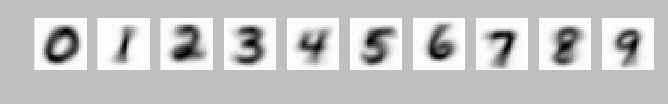


--------------------------------------
GaussianNB - Added Fill - Added Blur
Execution time: 0.0509 seconds
Accuracy: 0.795000

Report
             precision    recall  f1-score   support

       zero       0.90      0.98      0.94        99
        one       0.83      0.94      0.88       105
        two       0.85      0.81      0.83       102
      three       0.63      0.78      0.70        86
       four       0.93      0.60      0.73       104
       five       0.82      0.66      0.73        91
        six       0.83      0.88      0.86        98
      seven       0.90      0.74      0.82       113
      eight       0.78      0.67      0.72        96
       nine       0.62      0.88      0.72       106

avg / total       0.81      0.80      0.79      1000

--------------------------------------
            


In [118]:
def P9(add_fill = True, add_blur=False, plot_theta=False):
    data = np.copy(mini_train_data)
    data_labels = np.copy(mini_train_labels)
    dev = np.copy(dev_data)
    label = "GaussianNB"
    
    if add_fill:
        # adds one datum to training data for each class that has all pixel values = 1
        data = np.append(data, [np.ones(784) for i in range(10)], axis=0)
        data_labels = np.append(data_labels, [i for i in xrange(0,10,1)])
        label += ' - Added Fill'
    
    if add_blur:
        # blur training data with gaussian blur defined above
        label += ' - Added Blur'
        for i in xrange(0,len(data),1):
            data[i] = blurMatrix(data[i].reshape(28,28)).reshape(784)

    start = time.time()
    nb = GaussianNB() # init model
    nb.fit(data, data_labels) # fit model
    predictions = nb.predict(dev)
    end = time.time()
    
    # results report
    classification = classification_report(dev_labels, predictions, target_names=['zero','one','two','three','four','five','six','seven','eight','nine'])
    accuracy = (float(len(predictions)) - len(np.where(predictions != dev_labels)[0])) / len(predictions) # quick accuracy calculation
    results = (label, float(end - start), accuracy, classification)
    
    if plot_theta:
        # method to plot "average" image for each class
        plt.rcParams['image.cmap'] = 'binary'
        plt.rcParams['image.interpolation'] = 'none'
        n = 0
        for i in nb.theta_:
            n += 1
            plt.subplot(1,10,n)
            plt.imshow(i.reshape(28,28))
            plt.axis('off')
        plt.show()
        
    return results

displayOutput(P9(add_fill=False))
displayOutput(P9(add_fill=True))
displayOutput(P9(add_fill = True, add_blur=True, plot_theta=True))

ANSWER: You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

####An examination of the theta_ and sigma_ values generated by the GaussianNB fit revealed that many of the cells had a mean value of 0 and variance near 0 for every class. Given that some numbers in the dev data are bound to have large values in cells that the training data did not have, this looked to be the source of an overfit. In order to correct for this, I added one additional vector for each class to the training set where all pixel values were equal to 1. This served to increase the variance substantially without significantly altering the mean for each pixel. An additional gradient also helped to increase the variance of pixels near the middle, which helped the model generalize even further to the dev data.

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

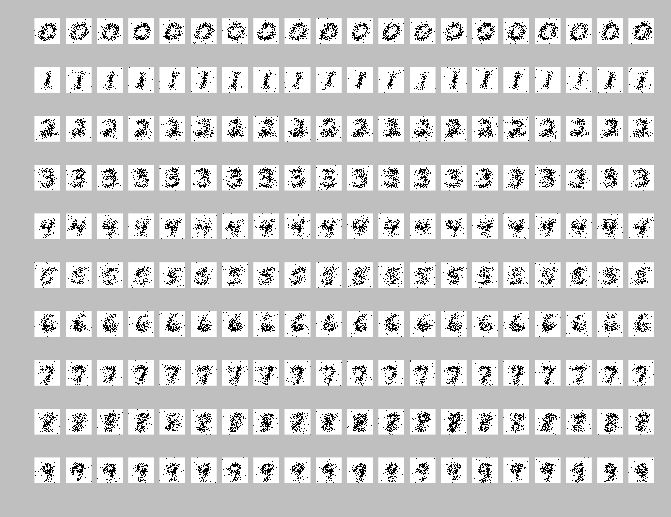

Plotting time: 14.5856349468


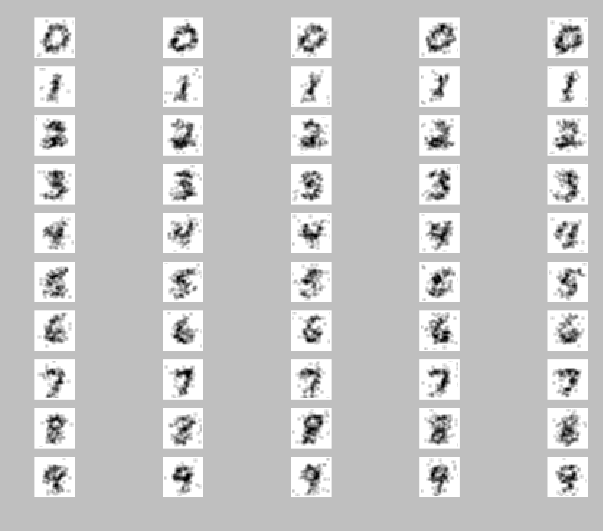

Plotting time: 3.27931594849


In [122]:
def P10(num_examples, add_blur=False):

    plt.rcdefaults() #reset default pyplot rc params, then set colormap and interpolation
    plt.rcParams['image.cmap'] = 'binary'
    plt.rcParams['image.interpolation'] = 'none'
    
    nb = BernoulliNB(binarize=.5) # initialize model with smoothing = .01, and data split at .05
    nb.fit(mini_train_data, mini_train_labels) # fit model
    
    def generateNum(k, feature_probs):
        probs = np.exp(feature_probs[k]) # get probabilities for each pixel
        rands = np.random.rand(784) # generate random uniform probabilities between 0:1
        probs[probs >= rands] = 1 # if the cell probability happens to be greater than the randomly generated value, render cell as black
        probs[probs < rands] = 0
        return probs
    
    start = time.time() #timer
    fig, plots = plt.subplots(10,num_examples) # create plot with 1 row for each digit and num_examples columns
    for i in xrange(0,10,1):
        for j in xrange(0,num_examples,1): # plot all examples
            newnum = generateNum(i, nb.feature_log_prob_)
            if add_blur: newnum = blurMatrix(newnum.reshape(28,28))
            plots[i][j].imshow(newnum.reshape(28,28)) # make array into matrix for plotting
            plots[i][j].axis('off')
    plt.show()
    plt.rcdefaults() #reset default pyplot rc param    
    print "Plotting time:", time.time() - start #timer


P10(20)
P10(5, add_blur=True)

ANSWER: How do the generated digits compare to the training digits?

####The generated digits have the same general shape as the training digits, and most are immediately recognizable to human eyes. The binary nature of the output, however, means that there is a lot of noise around the generated digits. Adding a blur slightly improves legibility.

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [367]:
def P11(buckets, correct, total):
    
### STUDENT START ###
    nb = BernoulliNB(alpha=.01, binarize=0.5) # initialize model with smoothing = .01, and data split at .05
    nb.fit(mini_train_data, mini_train_labels) # fit model
    predictions = nb.predict(dev_data) # get predictions from dev_data
    probs = nb.predict_proba(dev_data) # get posterior probabilities from dev_data
    for i in xrange(0,len(probs),1):
        maxp = float(np.max(probs[i]))
        for b in xrange(-1,-(len(buckets)+1), -1):
            if maxp >= buckets[b]:
                bucket = b
                break
        pcorr = predictions[i] == dev_labels[i]
        total[bucket] += 1.0
        if pcorr: correct[bucket] += 1.0

### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = float(correct[i]) / total[i]
    print 'p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy)

p(pred) <= 0.5000000000000    total =  30    accuracy = 0.200
p(pred) <= 0.9000000000000    total =  86    accuracy = 0.465
p(pred) <= 0.9990000000000    total =  85    accuracy = 0.612
p(pred) <= 0.9999900000000    total =  58    accuracy = 0.690
p(pred) <= 0.9999999000000    total =  61    accuracy = 0.754
p(pred) <= 0.9999999990000    total =  73    accuracy = 0.877
p(pred) <= 0.9999999999900    total =  75    accuracy = 0.840
p(pred) <= 0.9999999999999    total =  34    accuracy = 0.882
p(pred) <= 1.0000000000000    total = 498    accuracy = 0.958


ANSWER: How would you characterize the calibration for the Naive Bayes model?

####The model is weakly calibrated. While there is a definite positive correlation between posterior probability and actual results, the relationship is nonlinear and accuracy generally lags well behind posterior probability.

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [18]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()